# I will attempt to perform regression analysis on a dataset about the medical charges billed by a health insurance firm. 

In [1]:
# We will first add all the important libraries, to work my dataset. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
# We will then boot the right csv file with are dataset, using the correct path.
df = pd.read_csv("............/regression_data.csv")

In [6]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [38]:
# Τhese are the names of the columns of the dataset. They are also the variables of the regression analysis model. 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# As we can see, the columns of this dataset, are the following: 
1) bmi: Body mass index of each person.
2) children: Number of children of each person.
3) region is which region in US they live.
4) charges are in US Dollars.
5) sex is the sex of each person.
6) age is the age of each person.
7) smoker devides our sample into smokers and non-smokers.

In [39]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isnull().values.sum()
# Τhere are no missing values in this dataset

0

 Since there aren't any null values, Ι don't have to drop any columns. 

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

 The categorical variables are: smoker, sex and region. 

In [40]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [41]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

 Our sample is is fair since the male to female ratio is almost 50 - 50.

In [44]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

 From our sample, 42.8% have no children, 24.2% have one child, 18% have 2 children, 11.7% have 3 children, 1.8% have 4 children and 1.3% have 5 children. 

In [10]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

It seems that only 25.7% of our sample, are people who smoke. 

In [12]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

27% live in the southeast, 24.1% live in the southwest, 24.1% live in the northwest and 24% live in the northeast. 
 The sample is fair since all region ratio is exactly 1/4 for every sub-region.

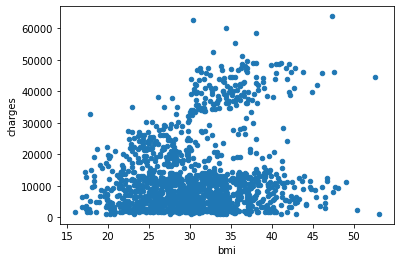

In [5]:
df.plot(x ='bmi', y='charges', kind = 'scatter')
plt.show()

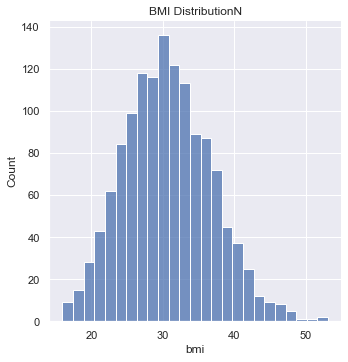

In [45]:
sns.set()
sns.displot(df["bmi"])
plt.title("BMI DistributionN")
plt.show()

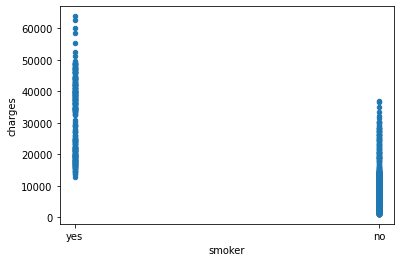

In [6]:
df.plot(x ='smoker', y='charges', kind = 'scatter')
plt.show()

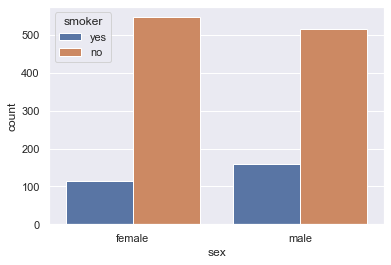

In [16]:
ax = sns.countplot(x=df.sex, hue=df.smoker)

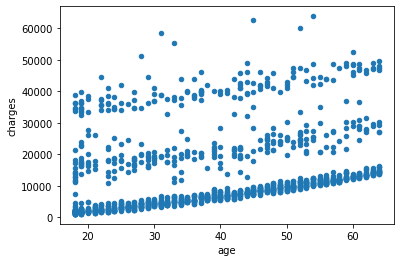

In [7]:
df.plot(x ='age', y='charges', kind = 'scatter')
plt.show()

<Figure size 864x720 with 0 Axes>

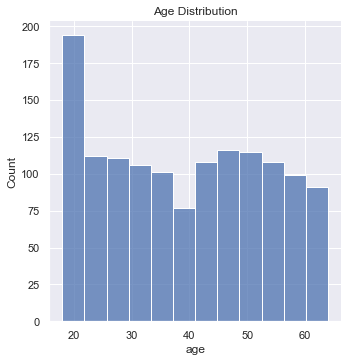

In [18]:
sns.set()
plt.figure(figsize = (12,10))
sns.displot(df["age"])
plt.title("Age Distribution")
plt.show()

 The vast majority of our dataset are people between 20 and 36. 

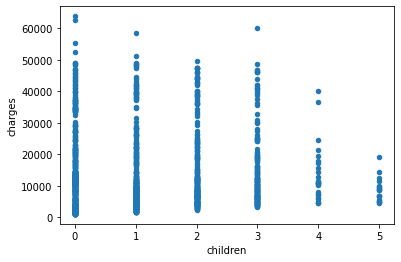

In [8]:
df.plot(x ='children', y='charges', kind = 'scatter')
plt.show()

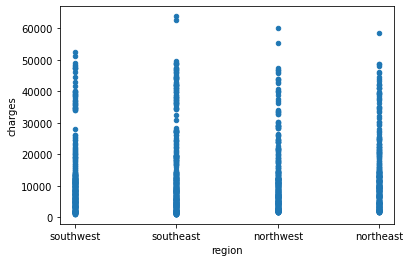

In [9]:
df.plot(x ='region', y='charges', kind = 'scatter')
plt.show()

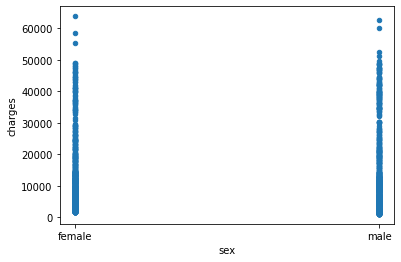

In [10]:
df.plot(x ='sex', y='charges', kind = 'scatter')
plt.show()

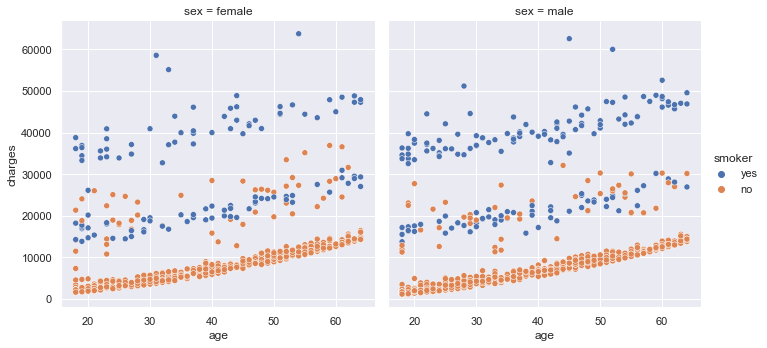

In [91]:
sns.relplot(x='age', y='charges', col='sex', hue='smoker', data=df)

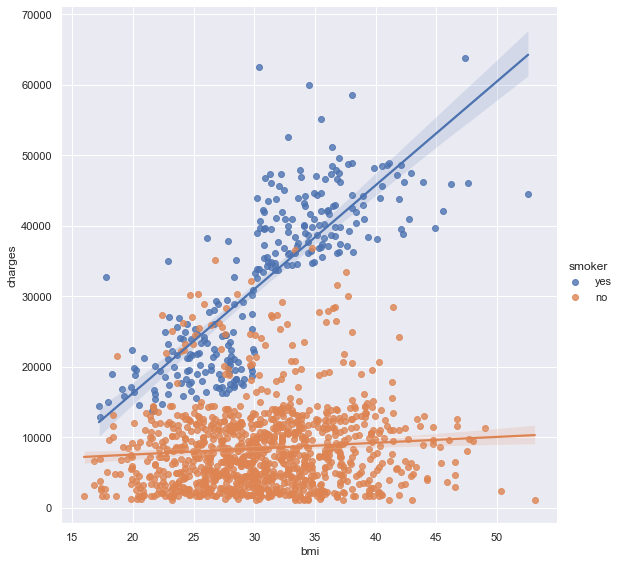

In [95]:
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df, height=8)

# We can conlude the following results from the scatter plots:
We can conclude that a higher bmi tends to result in increased medical costs.
It is evident that smokers tend to have higher medical costs than people who do not smoke. 
As the person's age increases, the medical costs increase.
Region and Sex didn't produce any significant results.
People with 2 and 3 children have slightly higher medical costs, than any other category. 
People who smoke and have a higher bmi, tend to have higher medical charges than people who don't smoke and have a lower bmi. 

# Now we will try to find any correlation between variables 

In [87]:
df.corr(method='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


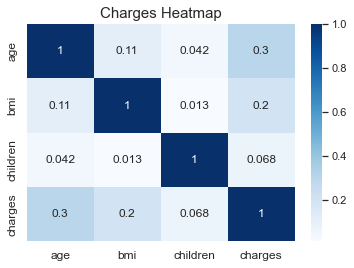

In [83]:
df_corr = df.corr()
sns.heatmap(
    df_corr, annot = True, cmap = 'Blues',
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values
);
plt.title('Charges Heatmap', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

 Since there are 3 categorical columns, they are excluded from this correlation heatmap. 

# Τhere are three categorical columns. Sex, Smoker and the Region. Since we can't feed this text data to our model, we're going to create classes or numerical labels for this.This proccess is called encoding.

In [7]:
# Ι will now encode the sex column.
df.replace({"sex":{"male":0,"female":1}}, inplace = True)

In [8]:
# I will now encode the smoker column.
df.replace({"smoker":{"no":0,"yes":1}}, inplace = True)

In [9]:
# And finaly, I will encode the region column into 4 different numerical labels.
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}}, inplace = True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


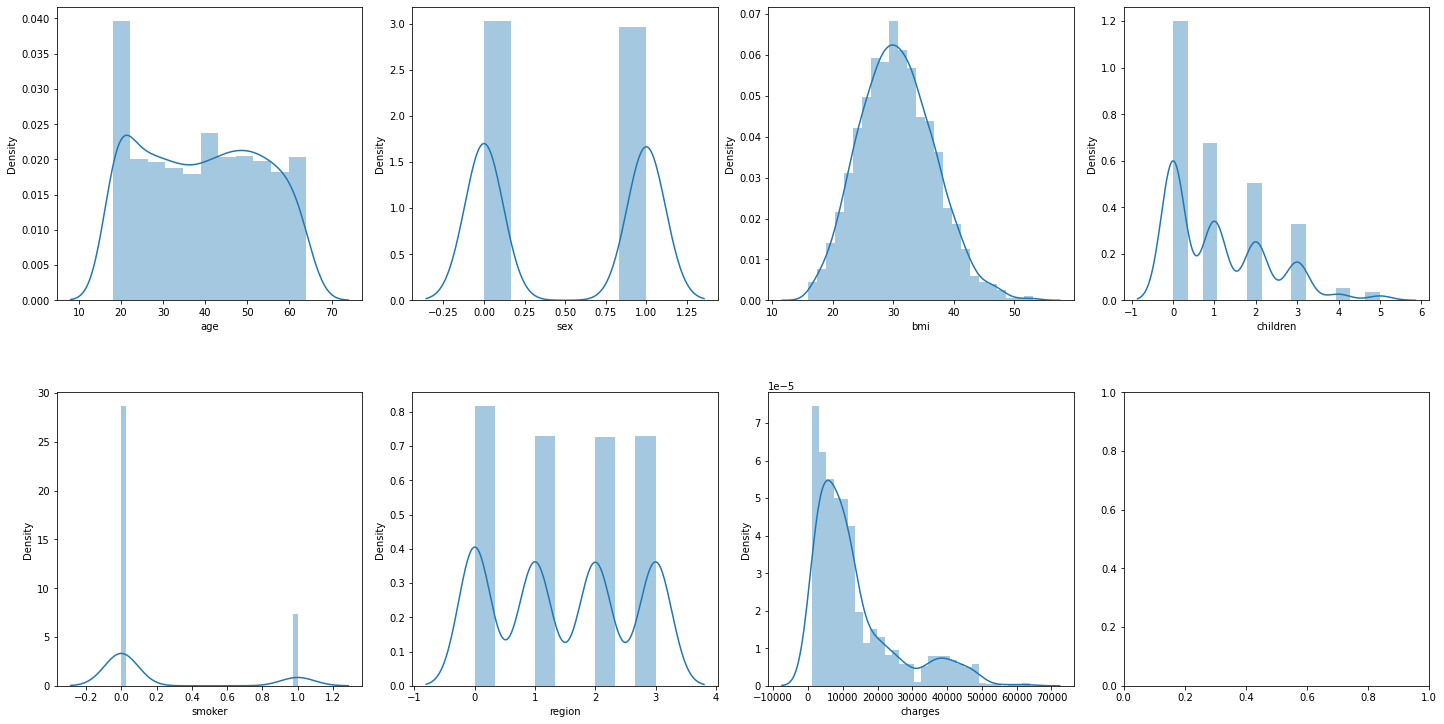

In [15]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+= 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

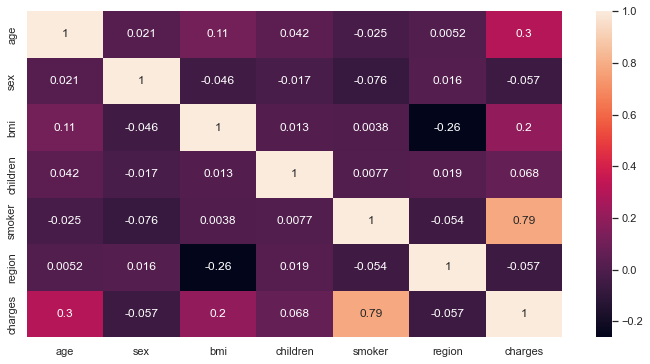

In [194]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

# Observations 
The highest correlations can be seen between smoker and charges.
Other significant correlations can be seen between age and charges, and between bmi and charges

# Train - Test Split
I will now create a train and a test dataset, in order to increase prediction accuracy. If i performed linear regression for all the data, I wouldn't be sure if it was accurate

In [10]:
# Let's choose those features that show some correlation (>0.20) with the dependent variable 'charges'.
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

In [11]:
# Ι will import this library to split my dataset
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("The number of rows and columns of X :",X.shape)
print("The number of rows and columns of X_train :",X_train.shape)
print("The number of rows and columns of X_test :",X_test.shape)

The number of rows and columns of X : (1338, 3)
The number of rows and columns of X_train : (1070, 3)
The number of rows and columns of X_test : (268, 3)


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 764 to 846
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     268 non-null    int64  
 1   bmi     268 non-null    float64
 2   smoker  268 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 8.4 KB


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1070 non-null   int64  
 1   bmi     1070 non-null   float64
 2   smoker  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


In [16]:
# Ι will import this library to perform linear regression
from sklearn.linear_model import LinearRegression

# First Linear Regression Model

In [17]:
LR1 = LinearRegression()

In [18]:
LR1.fit(X_train,y_train)

LinearRegression()

In [19]:
coeff_df = pd.DataFrame(LR1.coef_,X.columns,columns=['Coefficient'])
coeff_df
# It shows by how much these variables affect the dependent variable 'charges'

,Coefficient
age,259.410205
bmi,326.450232
smoker,23675.371847


In [20]:
print(LR1.intercept_)

-11707.802334583163


# Evaluate First Model

In [27]:
y_pred1 = LR1.predict(X_test)

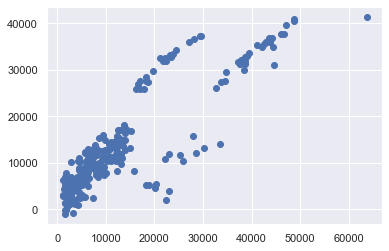

In [180]:
plt.scatter(y_test, y_pred1)
# Scatter Plot Test Values vs Predicted Values

In [181]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
# First Regression Evaluation

MAE: 4260.560091099392
MSE: 34512843.88022789
RMSE 5874.763304187488


In [185]:
score = r2_score(y_test,y_pred1)*100
print("R2_score",score)
# It is a fair score

R2_score 77.76932310583375


<AxesSubplot:xlabel='charges', ylabel='Density'>

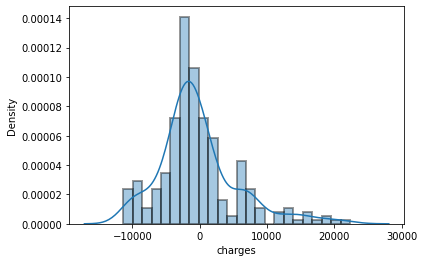

In [28]:
sns.distplot((y_test-y_pred1), hist_kws=dict(edgecolor="k", linewidth=2))

 The r-squared is relatively goof.Both MAE and RMSE show the average model prediction error for the medical charges. RMSE gives relatively high weight to large errors.

# Second Linear Regression Model

In [29]:
y_log_train = np.log1p(y_train)
# I have to apply log transormation, so that the data follow normal destribution. 

In [30]:
LR2 = LinearRegression()

In [31]:
LR2.fit(X_train,y_log_train)

LinearRegression()

In [32]:
coeff_df = pd.DataFrame(LR2.coef_,X.columns,columns=['Coefficient'])
coeff_df
# In this set, the variable 'smoker', affects the model by a huge amount

,Coefficient
age,0.034826
bmi,0.011152
smoker,1.548412


In [35]:
print(LR2.intercept_)

7.08369654340913


# Evaluate Second Model

In [33]:
y_pred2 = LR2.predict(X_test)
y_pred2 = np.expm1(y_pred2)

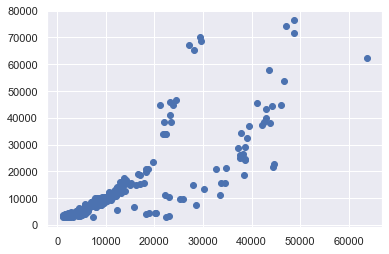

In [226]:
plt.scatter(y_test, y_pred2)
# Scatter Plot Test Values vs Predicted Values

In [ ]:
 from sklearn import metrics
 print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
 print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
 print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
# Second Regression Evaluation 

MAE: 4214.797488964256
MSE: 73191057.27337047
RMSE 8555.177220453734


RMSE increased but MAE decreased by a small percentage

In [229]:
score = r2_score(y_test,y_pred2)*100
print("R2_score",score)
# It is a much lower score

R2_score 52.85561655152795


<AxesSubplot:xlabel='charges', ylabel='Density'>

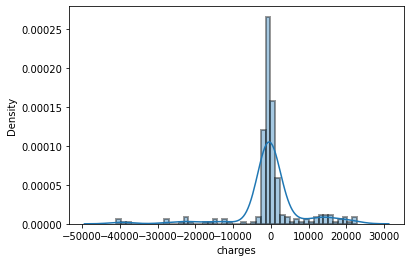

In [34]:
 sns.distplot((y_test-y_pred2), hist_kws=dict(edgecolor="k", linewidth=2))


# Prediction Model
Now I will make a model that predicts medical charges, using the varibles 'age' 'bmi' and 'smoker'.

In [21]:
def calc_insurance(age, bmi, smoking):
    y = ((age*LR1.coef_[0]) + (bmi*LR1.coef_[1]) + (smoking*LR1.coef_[2]) + LR1.intercept_)
    return y

In [233]:
print(calc_insurance(38, 24, 0))

5984.591012763254


 Α 38 year-old, non-smoker with a BMI of 24 can be charged at least 5.984,59 dollars in medical bills. 

In [234]:
print(calc_insurance(38, 24, 1))

29659.96285941855


Α 38 year-old, smoker with a BMI of 24 can be charged at least 29.658,59 dollars in medical bills. This is more than five times, what a non-smoker would pay. 

 I will now use this prediction model to see how I would be charged ( Hypothetical Scenario - I love my money)

In [240]:
print(calc_insurance(24, 25, 0))

2679.298380193357


Ι wouldn't be charged much - thank God :^)

In [242]:
print(calc_insurance(24, 25, 1))

26354.670226848655


 Ιf I smoked, I could be expected to pay up to 26.354 dollars. This is why I would never move to the U.S.A (being political)

# Thanks for your time :^)